### **Simple Linear regression**
- In this notebook I have practised Single simple Linear Regression Algorithm. 
- The dataset has only 2 features x & y.
- The reason I have choosed this dataset is to get the knowledge about handling the outliers and visualizing the results.

In [22]:
import pandas as pd 

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df= pd.read_csv(r"C:\Users\Karth\Downloads\Machine learning\Datasets\Linear Regression - Sheet1.csv")
df.head()

,X,Y
0,37.454012,87.648735
1,95.071431,205.854698
2,73.199394,126.230760
3,59.865848,121.413444
4,15.601864,53.658303


In [25]:
df.shape

(128, 2)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       128 non-null    float64
 1   Y       128 non-null    float64
dtypes: float64(2)
memory usage: 2.1 KB


In [27]:
df.describe()

,X,Y
count,128.000000,128.000000
mean,48.217645,94.137714
std,29.861721,49.657272
min,0.552212,6.757291
25%,19.943426,46.328995
50%,48.300526,92.810726
75%,77.104297,138.774430
max,98.688694,205.854698


**Data Cleaning**

In [28]:
df.isnull().sum()

X    0
Y    0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(0)

**Visualization**

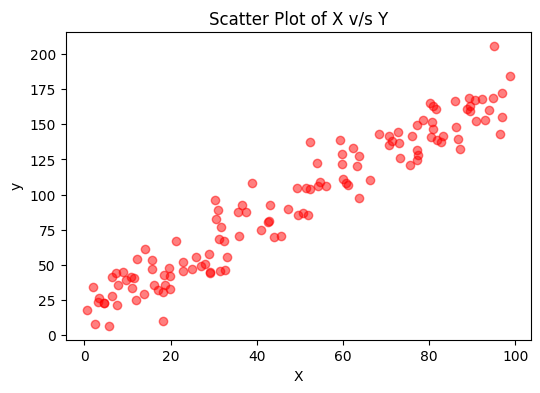

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
plt.scatter(df['X'], df['Y'], color='red', alpha= 0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X v/s Y')
plt.show()


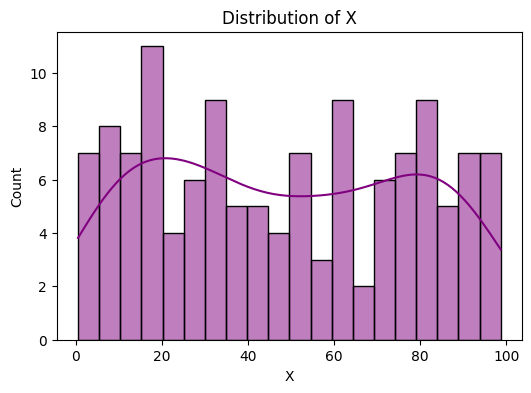

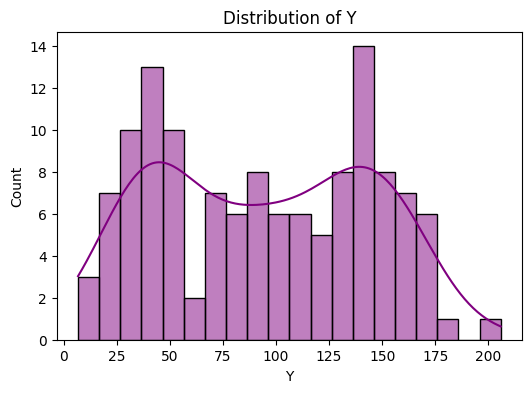

In [40]:
plt.figure(figsize=(6,4))
sns.histplot(df['X'], kde= True, bins= 20, color= 'purple')
plt.title('Distribution of X')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Y'], kde= True, bins=20, color= 'purple')
plt.title('Distribution of Y')
plt.show()

**Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression

X= df['X']
y= df['Y']

model= LinearRegression()
model.fit(X,y)

